# Basics of Neural Networks with scikit-learn

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

## Supporting function 

In [34]:
def plot_decision_boundary(clf, X, y, ax=None, title=None):
    h = .02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    if ax is None:
        ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolor='k')
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    if title:
        ax.set_title(title)

## Generate Dummy Dataset

In [35]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

## Visualize the Dataset

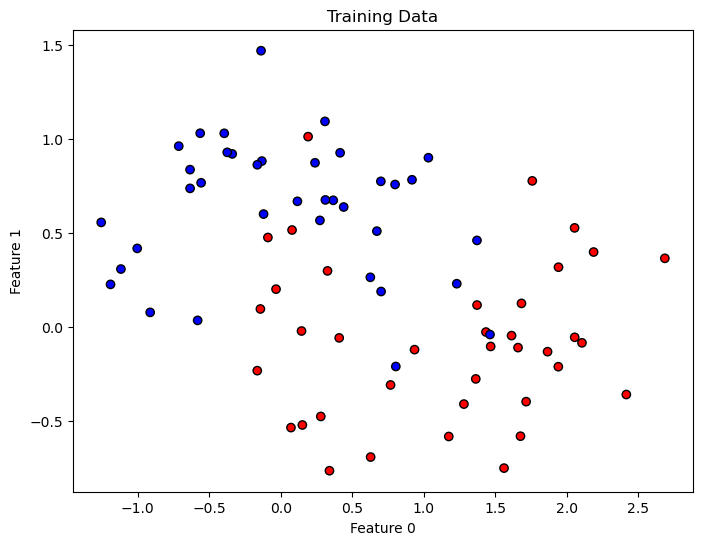

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.bwr, edgecolor='k')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Training Data')
plt.show()

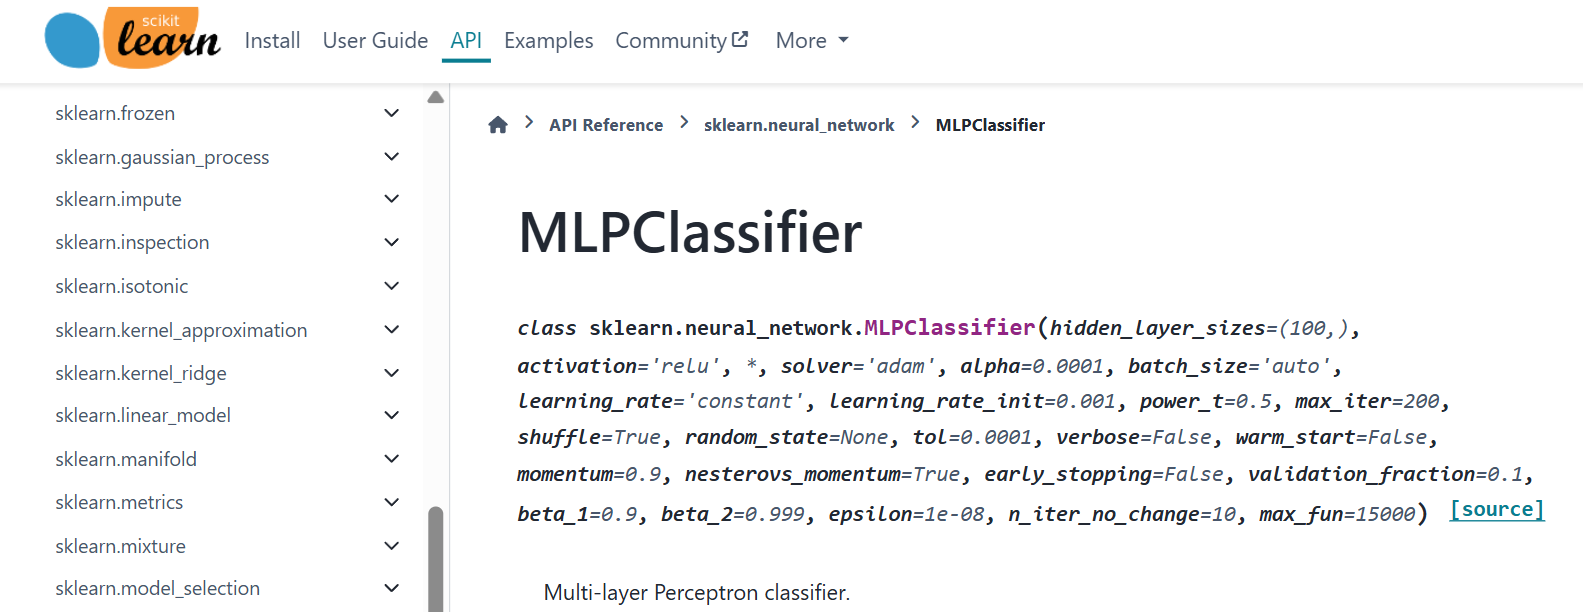

## First a Neural Network with a Single Hidden Layer and 5 Neurons

In [37]:
# Single hidden layer with 10 units
mlp_single = MLPClassifier(hidden_layer_sizes=[5], max_iter=200,
                           solver='sgd', random_state=0)
mlp_single.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=[5], random_state=0, solver='sgd')

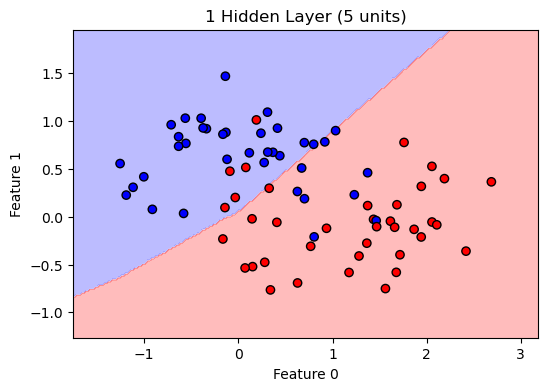

In [38]:
plt.figure(figsize=(6,4))
plot_decision_boundary(mlp_single, X_train, y_train, title='1 Hidden Layer (5 units)')
plt.show()

## First a Neural Network with a Single Hidden Layer and 10 Neurons

In [39]:
# Single hidden layer with 10 units
mlp = MLPClassifier(hidden_layer_sizes=[10], max_iter=200,
                    solver='sgd', random_state=0)
mlp.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=[10], random_state=0, solver='sgd')

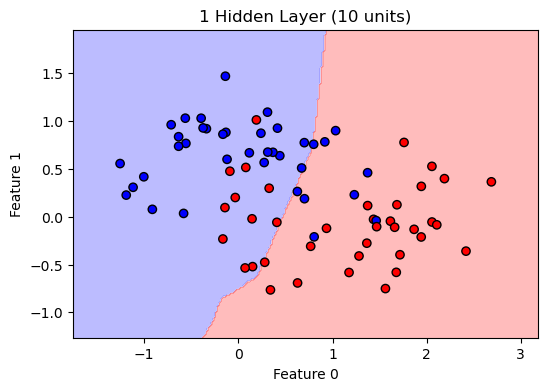

In [40]:
plt.figure(figsize=(6,4))
plot_decision_boundary(mlp, X_train, y_train, title='1 Hidden Layer (10 units)')
plt.show()

## Fit a Neural Network with Two Hidden Layers

In [41]:
# Two hidden layers, each with 10 units
mlp_double = MLPClassifier(hidden_layer_sizes=[10, 10], max_iter=200,
                           solver='sgd', random_state=0)
mlp_double.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=[10, 10], random_state=0, solver='sgd')

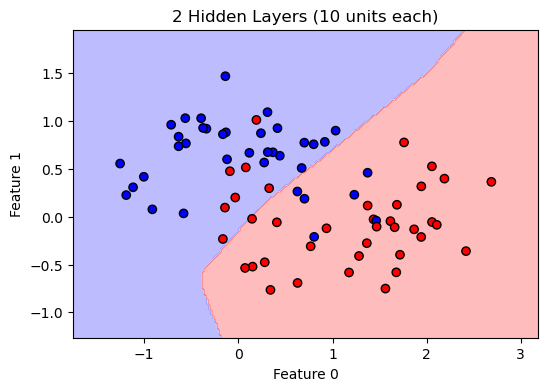

In [42]:
plt.figure(figsize=(6,4))
plot_decision_boundary(mlp_double, X_train, y_train, title='2 Hidden Layers (10 units each)')
plt.show()

## Fit a Deep Neural Network

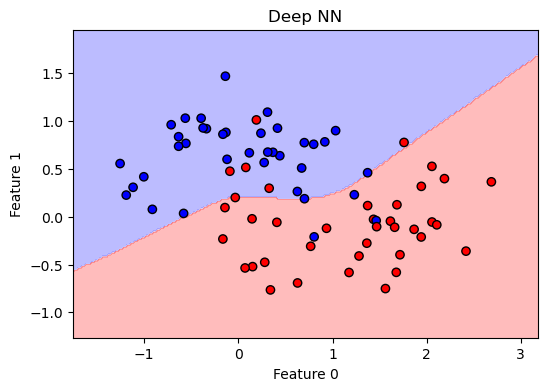

In [43]:
# Two hidden layers, each with 10 units
mlp_deep = MLPClassifier(hidden_layer_sizes=[1000, 500, 200, 100, 10], max_iter=2000,
                           solver='sgd')
mlp_deep.fit(X_train, y_train)

plt.figure(figsize=(6,4))
plot_decision_boundary(mlp_deep, X_train, y_train, title='Deep NN')
plt.show()

## Try different architectures

In [44]:
def create_model(hidden_layer_sizes, max_iter=200, X=X, y=y):
    _mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter,
                         solver='sgd')
    _mlp.fit(X, y)
    plt.figure(figsize=(6,4))
    plot_decision_boundary(mlp, X_train, y_train, title=f"{hidden_layer_sizes}")
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


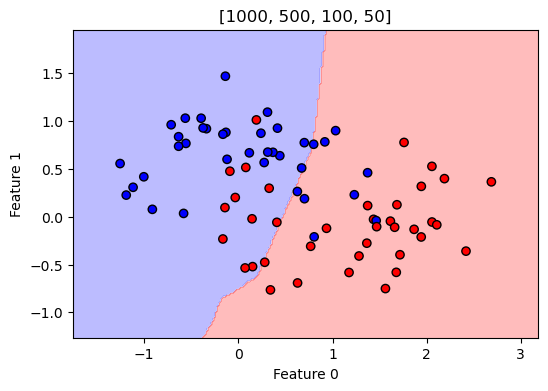

In [45]:
create_model(hidden_layer_sizes=[1000, 500, 100, 50], # Neural Network with multiple hidden layers
             max_iter=100
             )

Single-layer networks:

[10] → 1 hidden layer with 10 neurons (simple architecture)

[50] → 1 hidden layer with 50 neurons (moderate complexity)

[100] → 1 hidden layer with 100 neurons (deeper representation)

Multi-layer networks:

[(]50, 30] → 2 hidden layers with 50 and 30 neurons respectively

[100, 50, 25] → 3 hidden layers with decreasing neuron counts (useful for feature refinement)

[200, 100, 50] → A deep network with gradually decreasing layer sizes

Deeper setups:

[500, 250, 100] 

[10, 10, 10, 10, 10]

[1024, 512, 256, 128, 64] → Used for large-scale problems with high-dimensional data

Training: simple_na - Architecture: [10]


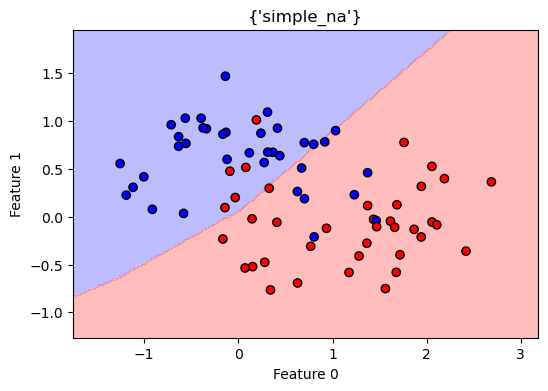

Training: moderate_na - Architecture: [50]


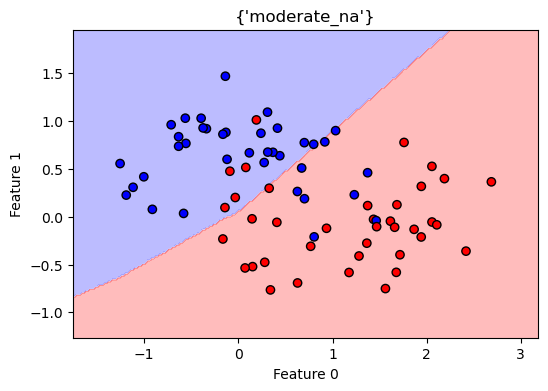

Training: deeper_na - Architecture: [100]


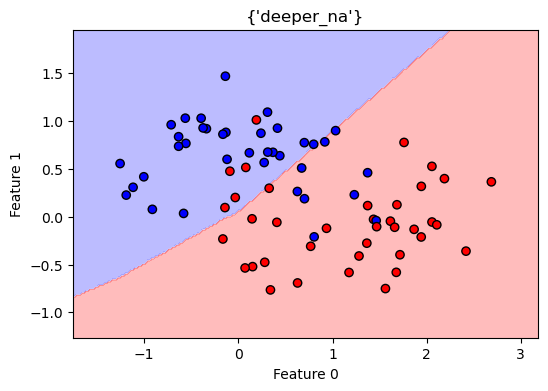

Training: 2_layer - Architecture: [50, 30]


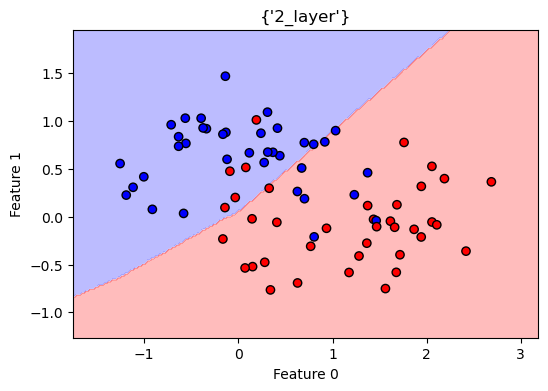

Training: 3_layer - Architecture: [100, 50, 25]


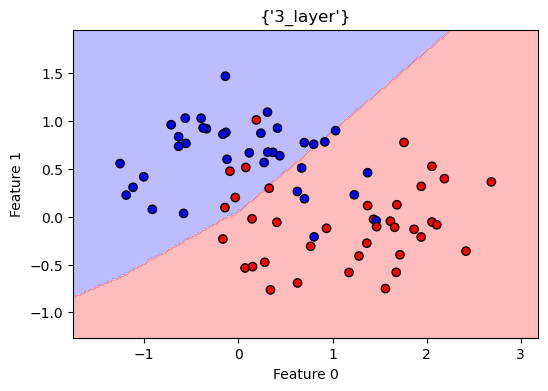

Training: 3deep_layer - Architecture: [200, 100, 50]


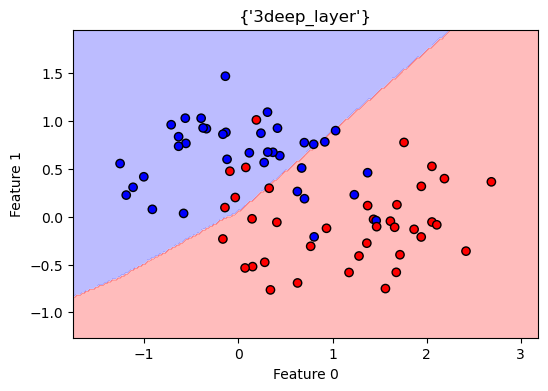

Training: 31deep_layer - Architecture: [500, 250, 100]


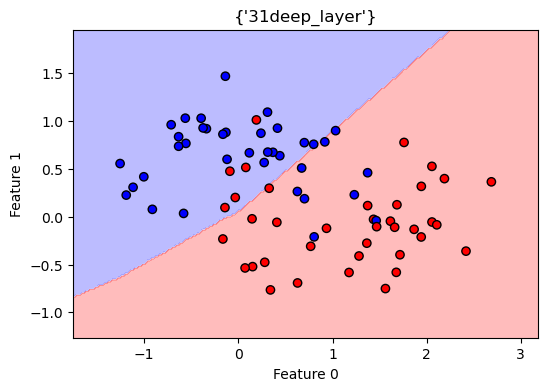

Training: 5_layer - Architecture: [10, 10, 10, 10, 10]


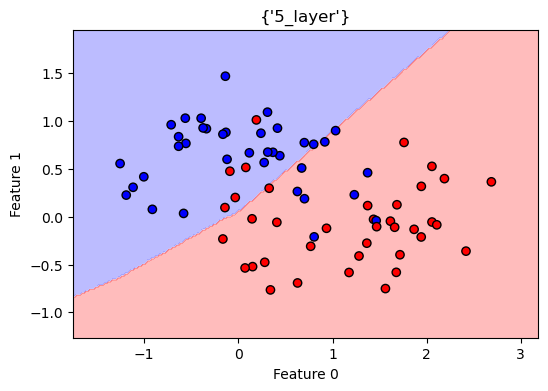

Training: 5deep_layer - Architecture: [1024, 512, 256, 128, 64]


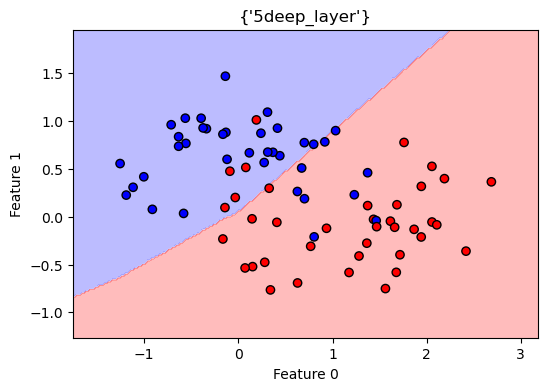

In [87]:

arch = {
    "simple_na": [10],
    "moderate_na": [50],
    "deeper_na": [100],
    "2_layer": [50, 30],
    "3_layer": [100, 50, 25],
    "3deep_layer": [200, 100, 50],
    "31deep_layer": [500, 250, 100],
    "5_layer": [10, 10, 10, 10, 10],
    "5deep_layer": [1024, 512, 256, 128, 64]
}




for i, (name, hidden_layers) in enumerate(arch.items()):
    print(f"Training: {name} - Architecture: {hidden_layers}")
    
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=500000, solver='adam', 
                        random_state=42, alpha=0.01, early_stopping=True)
    
    mlp.fit(X_train, y_train)
    plt.figure(figsize=(6,4))
    plot_decision_boundary(mlp_single, X_train, y_train, title={name})
    plt.show()
    


In [88]:

arch = {
    "simple_na": [10],
    "moderate_na": [50],
    "deeper_na": [100],
    "2_layer": [50, 30],
    "3_layer": [100, 50, 25],
    "3deep_layer": [200, 100, 50],
    "31deep_layer": [500, 250, 100],
    "5_layer": [10, 10, 10, 10, 10],
    "5deep_layer": [1024, 512, 256, 128, 64]
}

out_dict = {}



for i, (name, hidden_layers) in enumerate(arch.items()):
    print(f"Training: {name} - Architecture: {hidden_layers}")
    
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=500000, solver='adam', 
                        random_state=42, alpha=0.01, early_stopping=True)
    
    mlp.fit(X_train, y_train)
    
    print(f"{name} : {mlp.n_iter_} : {mlp.loss_curve_}")


    out_dict[name] = {
        "model": mlp,
        "loss_curve": mlp.loss_curve_,
        "iterations": mlp.n_iter_
    }


Training: simple_na - Architecture: [10]
simple_na : 12 : [0.8834509694904934, 0.8808033220902662, 0.8781626281653168, 0.8755140210896811, 0.8728831513684921, 0.8702528815658069, 0.8676264676428472, 0.8649970294217129, 0.8623686251716979, 0.8597511154748438, 0.8571588903762254, 0.8545762467142176]
Training: moderate_na - Architecture: [50]
moderate_na : 14 : [0.73810520547259, 0.7346380708866196, 0.731213007489758, 0.7278211528924673, 0.7244501527177357, 0.7211016988270952, 0.7177806658805359, 0.714465478872945, 0.711170740362457, 0.7079002369423031, 0.7046376181020697, 0.7013954483958351, 0.6981699311057595, 0.6949667668861531]
Training: deeper_na - Architecture: [100]
deeper_na : 12 : [0.7876547277139957, 0.7801240341676056, 0.7726880298364219, 0.7653483089604717, 0.7580993899764279, 0.7509470168904464, 0.7438794271675807, 0.7369112711368047, 0.7300218604572832, 0.7232143344884774, 0.7164929745716564, 0.7098692538351904]
Training: 2_layer - Architecture: [50, 30]
2_layer : 26 : [0.71

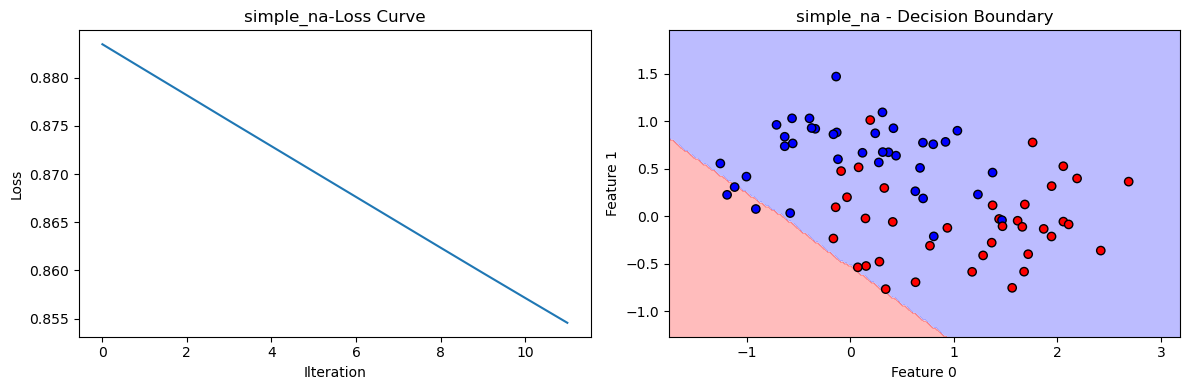

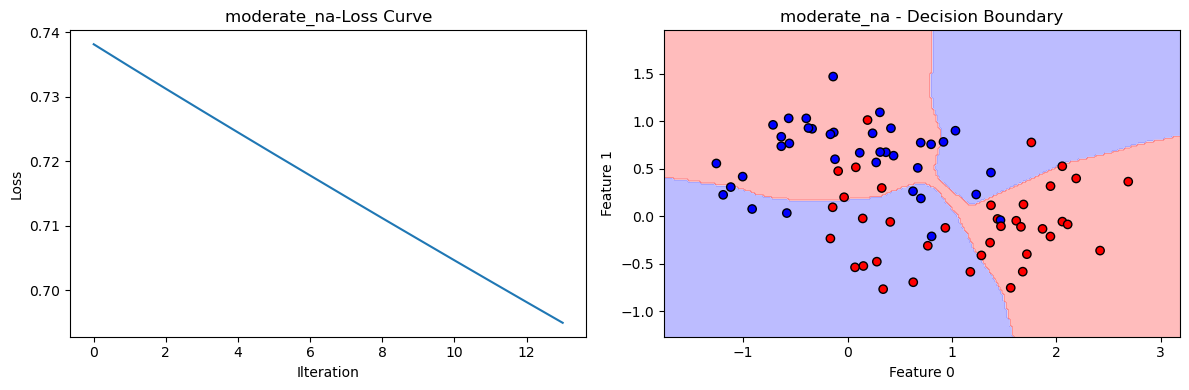

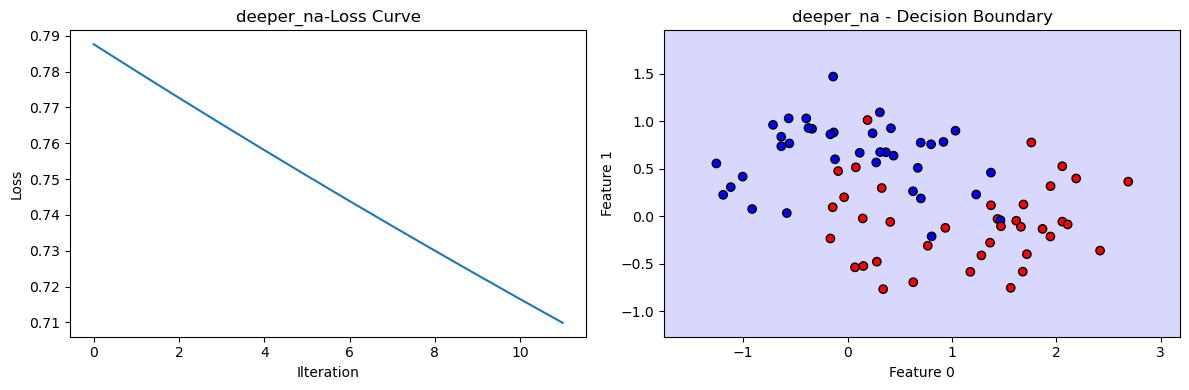

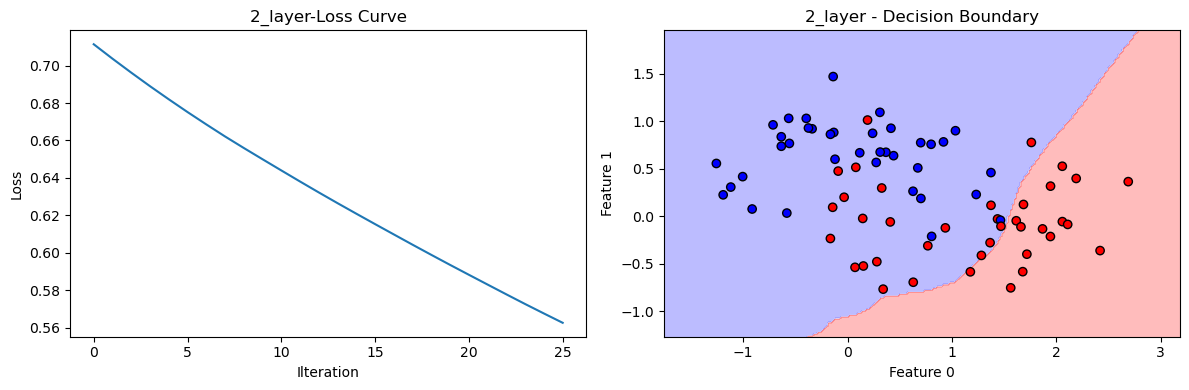

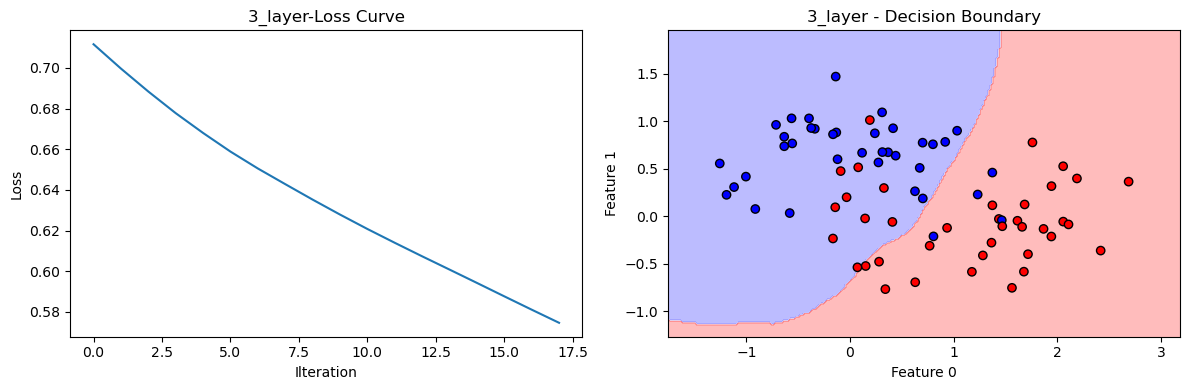

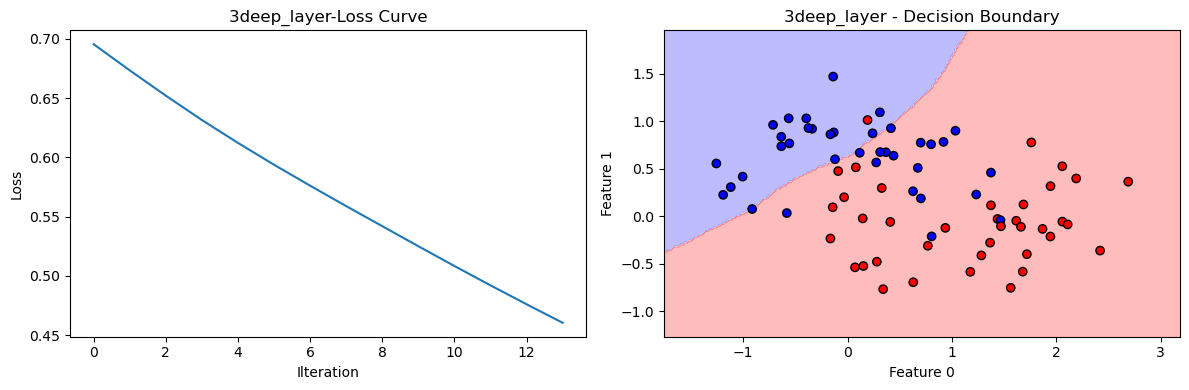

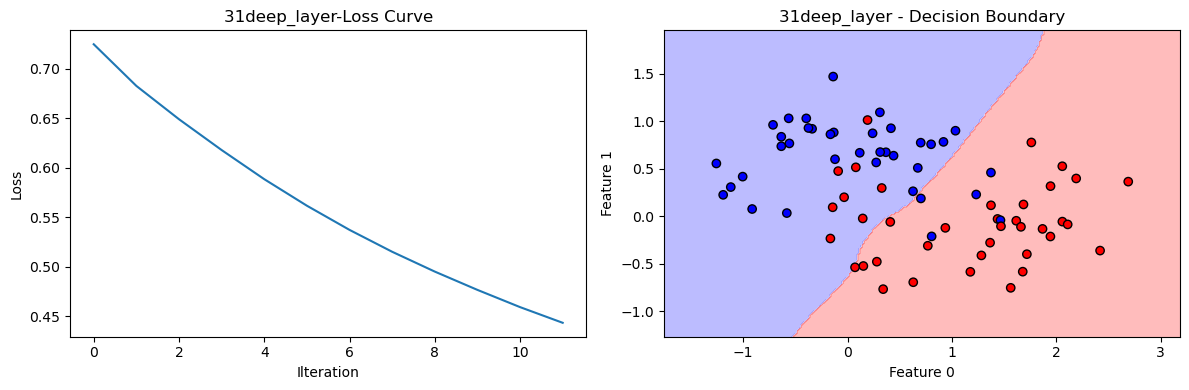

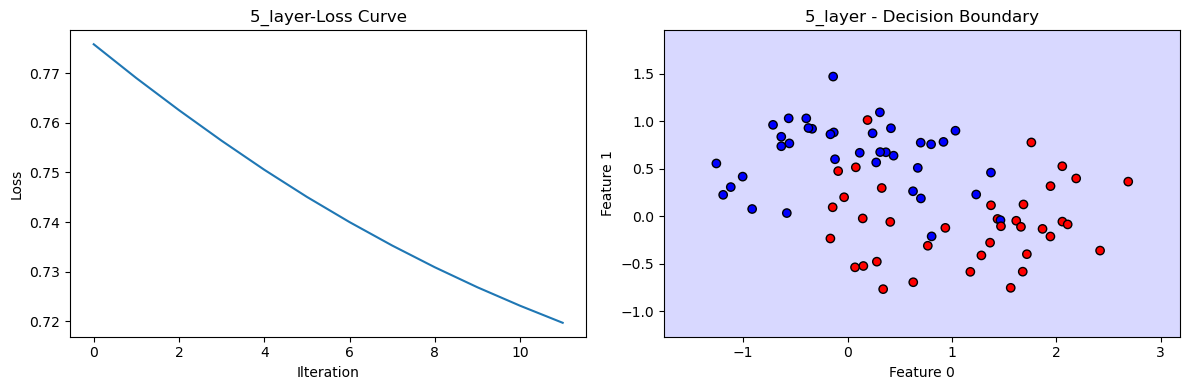

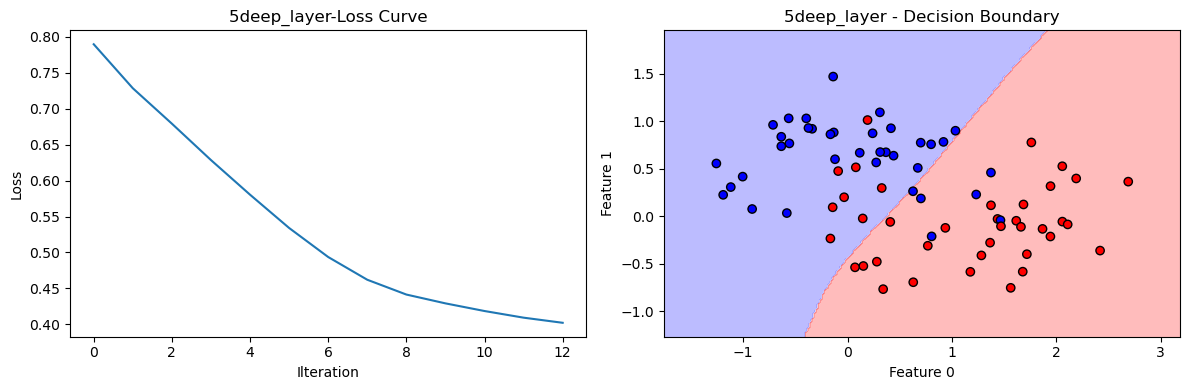

In [89]:
 for i, (name, hidden_layers) in enumerate(arch.items()):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    #loss curve graph 
    axs[0].plot(out_dict[name]['loss_curve'])
    axs[0].set_title(f"{name}-Loss Curve")
    axs[0].set_xlabel("Ilteration")
    axs[0].set_ylabel("Loss")
            

    #mlp fraph
    if X_train.shape[1] == 2:
        plot_decision_boundary(out_dict[name]['model'], X_train, y_train, title=f"{name} - Decision Boundary", ax=axs[1])
    else:
        axs[1].text(0.5, 0.5, "Only for 2D inputs", ha='center', va='center')
        axs[1].set_title(f"{name} - Decision Boundary")
        axs[1].axis('off')

    plt.tight_layout()
    plt.show()